# SPLEX-Project 2020-2021 : Frog Calls 
-------
## 🐸 Step 1 : Visualisation of the dataset 🐸
#### *Adrien Leroy and Antoine Auvergne*

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from scipy.io.wavfile import write
import chart_studio.plotly as py
from plotly.graph_objs import *
import plotly.express as px
import nbformat

### A-Description of the dataset

 * Acoustic features extracted from syllables of anuran (frogs) calls, including the family, the genus, and the species labels. 
 
 * Number of instances : 7195
 * Number of features : 22
 * **3 Labels :**

| Families | Genus | Species |
| :-- | :--- | :--- |
| Dendrobatidae | Adenomera | AdenomeraAndre |
| Hylidae | Ameerega | AdenomeraHylaedact |
| Leptodactylidae | Dendropsophus | ScinaxRuber |
| | Hypsiboas| Ameeregatrivittata |
| | Leptodactylus | HylaMinuta |
| | Osteocephalus | HypsiboasCinerascens |
| | Rhinella |HypsiboasCordobae |
| | Scinax| LeptodactylusFuscus |
| | | OsteocephalusOopha |
| | | Rhinellagranulosa |



#### Key variables

In [11]:
dataset=pd.read_csv('../anuran_calls/Frogs_MFCCs.csv')
features=dataset.columns[:-4]
labels=dataset.columns[-4:]

#### Basic infos

In [12]:
display(dataset)
print(features)
print(labels)
print(np.unique(dataset[labels[2]]))

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22'],
      dtype='object')
Index(['Family', 'Genus', 'Species', 'RecordID'], dtype='object')
['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']


#### Distributions of the sample

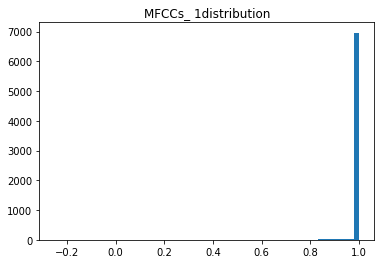

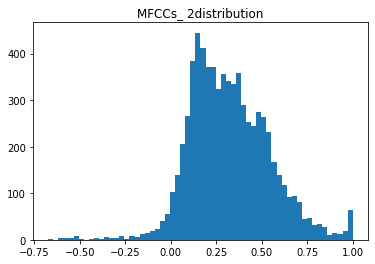

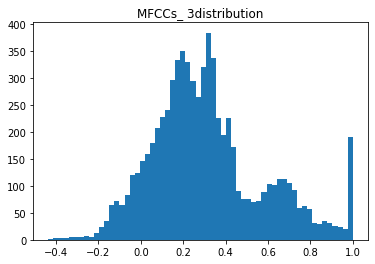

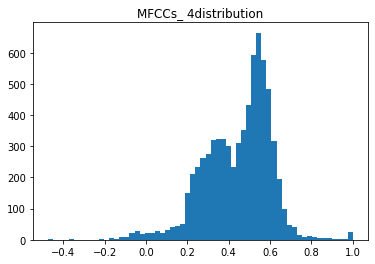

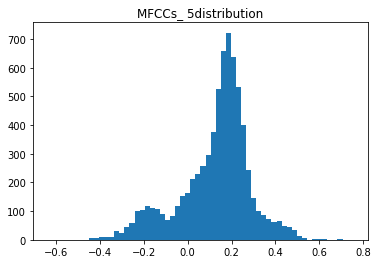

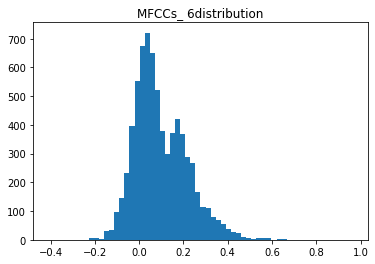

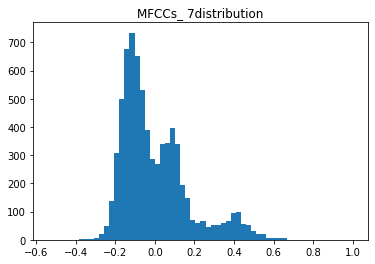

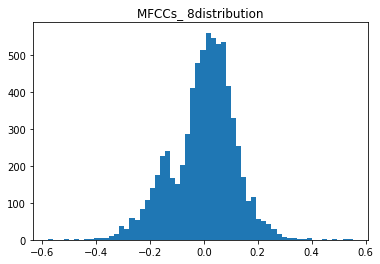

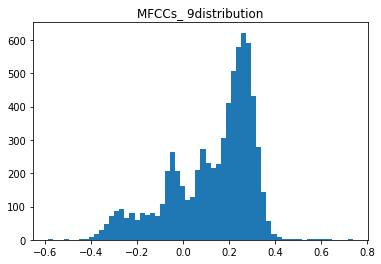

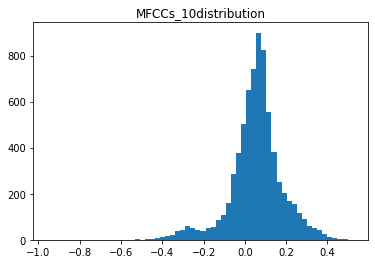

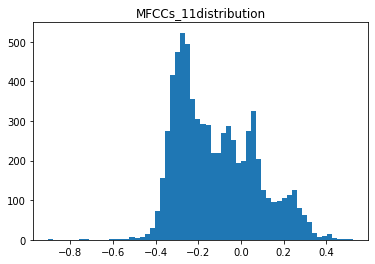

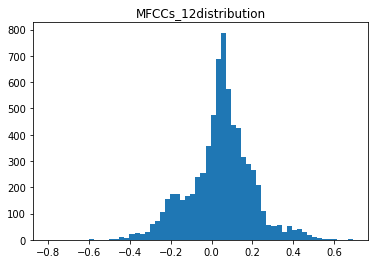

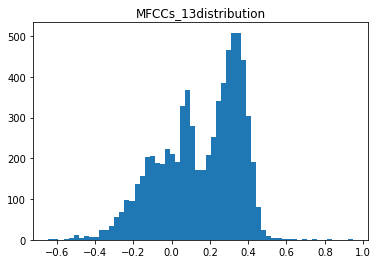

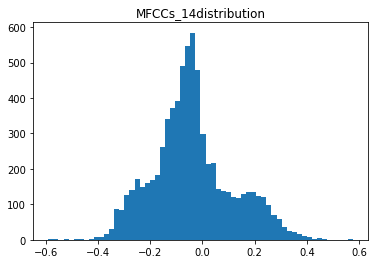

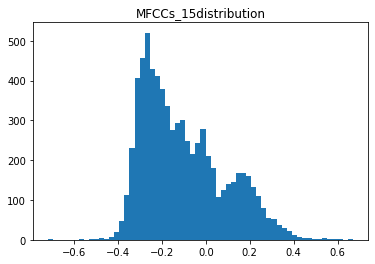

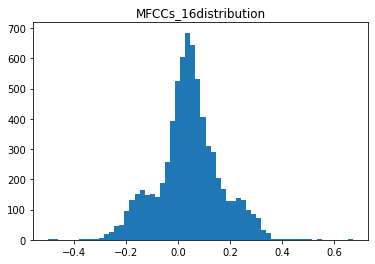

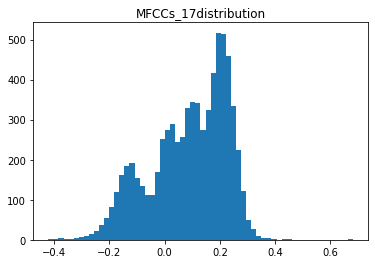

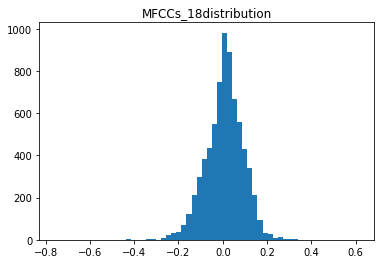

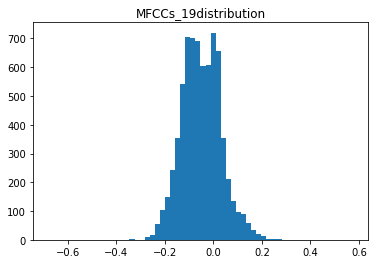

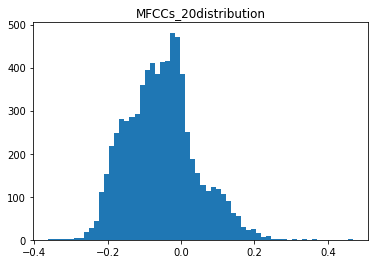

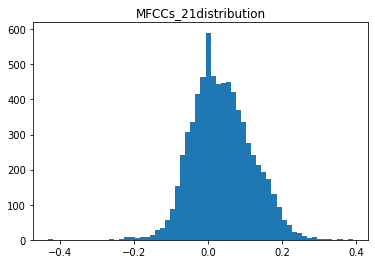

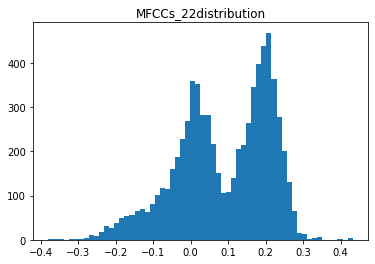

In [13]:
def CoefficientDistribution(name,values):
    plt.figure()
    plt.hist(values,bins=60)
    plt.title(name+"distribution")
    plt.show()
    pass

for feature in features:
    CoefficientDistribution(feature,dataset[feature])

#### What can we say 🐸

 1. MFCCs_1 wont be useful 
 2. Multiple normal distributions in most of the features

#### Correlation between features

In [19]:
df = px.data.iris()
datasetfeatures=dataset[features[1:]]
                    
display
fig = px.scatter_matrix(datasetfeatures,
    dimensions=datasetfeatures.columns,
    color=dataset[labels[2]],width=1200, height=1200)
fig.show()

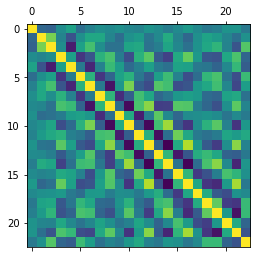

In [8]:
plt.matshow(dataset.corr())
plt.show()

#### Trying to convert files into sound 🐸
**It's really ~~bad~~ not very good**

In [32]:
MFFCs=dataset.iloc[1:,:-4].values

MFFC1=np.array([MFFCs[0,:]])
MFFC2=np.array([MFFCs[3000,:]])
MFFC3=np.array([MFFCs[6000,:]])

signal1=librosa.feature.inverse.mfcc_to_audio(MFFC1).flatten()
signal2=librosa.feature.inverse.mfcc_to_audio(MFFC2).flatten()
signal3=librosa.feature.inverse.mfcc_to_audio(MFFC3).flatten()

print("Signal n°1 !")
display(ipd.Audio(signal1, rate=41000, autoplay=False))
print("Signal n°2 ..?")
display(ipd.Audio(signal2, rate=41000, autoplay=False))
print("Signal n°3 ...")
display(ipd.Audio(signal3, rate=41000, autoplay=False))

Signal n°1 !


Signal n°2 ..?


Signal n°3 ...



### B-References


1. COLONNA, J. G.; CRISTO, M.; SALVATIERRA, M.; NAKAMURA, E. F. 
[**An Incremental Technique for Real-Time Bioacoustic Signal Segmentation**](https://github.com/LeroyAdrien/FrogCalls/blob/main/references/j.eswa.2015.05.030.pdf)
Expert Systems with Applications, v. 42, p. 7367-7374, 2015.


2. COLONNA, J. G.; GAMA, J.; NAKAMURA, E. F.
[**How to Correctly Evaluate an Automatic Bioacoustics Classification Method**](https://www.researchgate.net/publication/304251931_How_to_Correctly_Evaluate_an_Automatic_Bioacoustics_Classification_Method) 
In: 17th Conference of the Spanish Association for Artificial Intelligence (CAEPIA). 
Lecture Notes in Computer Science. 986ed.: Springer International Publishing, 2016, v. , p. 37-47.


3. COLONNA, J. G.; GAMA, J.; NAKAMURA, E. F. 
[**Recognizing Family, Genus, and Species of Anuran Using a Hierarchical Classification Approach**](https://www.researchgate.net/publication/305335644_Recognizing_Family_Genus_and_Species_of_Anuran_Using_a_Hierarchical_Classification_Approach).
Lecture Notes in Computer Science. 995ed.: Springer International Publishing, 2016, v. 9956, p. 198-212.


4. COLONNA, J. G.; RIBAS, A. D.; SANTOS, E. M.; NAKAMURA, E. F.
[**Feature Subset Selection for Automatically Classifying Anuran Calls Using Sensor Networks**](https://www.researchgate.net/publication/256473680_Feature_Subset_Selection_for_Automatically_Classifying_Anuran_Calls_Using_Sensor_Networks). 
In: International Joint Conference on Neural Networks, 2012, Brisbane. 
Proceedings of the International Joint Conference on Neural Networks (IJCNN 2012), 2012. p. 1-8. IEEE


5. COLONNA, J. G.; PEET, T.; FERREIRA, C. A.; JORGE, A. M.; GOMES, E. F.; GAMA, J. (2016, July). 
[**Automatic Classification of Anuran Sounds Using Convolutional Neural Networks**](https://repositorio.inesctec.pt/bitstream/123456789/4309/1/P-00K-S9H.pdf). 
In Proceedings of the Ninth International C* Conference on Computer Science & Software Engineering (No. C3S2E '16, pp. 73-78). ACM.


6. COLONNA, J. G.; CRISTO, M.; NAKAMURA, E. F. (2014, August). 
[**A Distributed Approach for Classifying Anuran Species Based on Their Calls**](https://github.com/LeroyAdrien/FrogCalls/blob/main/references/icpr.2014.223.pdf). 
In Pattern Recognition (ICPR), 2014 22nd International Conference on (pp. 1242-1247). IEEE.


7. RIBAS, A. D.; COLONNA, J. G.; FIGUEIREDO, C. M. S.; NAKAMURA, E. F.
[**Similarity clustering for data fusion in wireless sensor networks using k-means**](https://github.com/LeroyAdrien/FrogCalls/blob/main/references/IJCNN.2012.6252430.pdf)
The 2012 International Joint Conference on Neural Networks (IJCNN 2012), p. 1-7. IEEE


8. DIAZ, J. M.; COLONNA, J. G.; SOARES, R. B.; FIGUEREIDO, C. M. S.; NAKAMURA, E. F.
[**Compressive sensing for efficiently collecting wildlife sounds with wireless sensor networks**](https://www.researchgate.net/publication/256473755_Compressive_Sensing_for_Efficiently_Collecting_Wildlife_Sounds_with_Wireless_Sensor_Networks)
21st International Conference on Computer Communications and Networks (ICCCN 2012), p. 1-7. IEEE